# Classificazione e Sentiment analysis su post provenienti da Reddit

**Studente:** Rosario Cannavò
<br>
**Matricola:** 1000004011
<br>
**A.A:** 2021/2022

## 1. Introduzione

Come già noto, Reddit è un social network caratterizzato da una struttura simile ai primissimi forum che popolavano internet fino a qualche anno fa e fornivano un pensiero attuale sui vari topic che affrontavano. Riprendendo questo concetto si vuole addestrare un algoritmo di machine learning che opportunamente addestrato e ottimizzato riesca a classificare la categoria di un post. Nello specifico, andando ad allenare un'istanza dell'algoritmo kNN su post che provengono da vari subreddit che trattano di linguaggi di programmazione e da altri il cui argomento di interesse è diverso dal mondo della programmazione e dell'informatica in generale in modo tale che alla fine esso riesca a classificare nuovi post, indicando se essi appartengono al mondo della programmazione o meno. 
A tal proposito andremo ad utilizzare l'algoritmo K-Nearest Neighbour e una sua ottimizzazione. I punti su cui lavorerà l'algoritmo saranno i vettori bag of words opportunamente estrapolati dai post di esempio. 
Dopo aver effettuato la classificazione, una seconda parte del progetto consisterà nel calcolare il sentiment dei post che parlano di programmazione. A tal proposito verrà utilizzato l'algoritmo VADER e in conclusione verrà calcolata la media delle valutazioni, in questo modo sarà possibile capire se generalmente gli utenti di Reddit utilizzano il social network per esporre difetti e lamentele dei vari linguaggi o per elogiarne le funzionalità e le potenzialità.  

Per accedere ai contenuti dei vari subreddit utilizzeremo le API di Reddit fornite dal wrapper Praw. Come citato nel tutorial ([Tutorial Reddit](https://github.com/rosariocannavo/TutorialSocialMediaManagement)), per avere accesso sarà necessario registrarsi a Reddit come programmatori e riscattare i token di identificazione.

In [1]:
import praw 
reddit = praw.Reddit(client_id = 'tvHkTZ-wanEENSM1GSdQ5w',
                     client_secret = 'kw-wzX7cNVvYYi8VBCjxjQp5C2Pn9Q',
                     username = 'tutorialSocialMedia',
                     password = 'password123',
                     user_agent = 'tutorialpython'
                    )

## 2. Estrazione dei dati e creazione del dataset

Dopo aver ottenuto l'oggetto **reddit**, potremo esplorare i vari subreddit del social network utilizzando i metodi del wrapper. Nelle prossime righe sarà effettuata l'estrapolazione dei post più recenti in modo da costruire un dataset di partenza su cui addestrare e testare gli algoritmi che saranno utilizzati.
E' importante notare che il numero di post ritornati dal metodo "hot" non è fisso, per tale motivo è stabilito un limite superiore (posto a 5000) per evitare di appesantire e rallentare eccessivamente l'algoritmo.

I post sono nello specifico ottenuti dai subreddit: "Python", "C++", "Sushi", "Guitar", "Java", "nba","news" e "Ada".
Inoltre, conoscendo la provenienza dei post durante la fase di costruzione del dataset, è stato assegnato ad ognuno di essi, la classe di appartenenza "reale". Le possibili classi sono "**programming**" e "**non programming**", ad indicare la natura del post. 

In [2]:
subred = reddit.subreddit("Python")

In [3]:
import pandas as pd
df1 = []
for post in subred.hot(limit=5000):
    df1.append([post.title[:40], post.selftext, "programming"]
             )
df1 = pd.DataFrame(df1, columns=["title","text","class"])

In [4]:
df1.head()

,title,text,class
0,Sunday Daily Thread: What's everyone wor,Tell /r/python what you're working on this wee...,programming
1,Saturday Daily Thread: Resource Request,Found a neat resource related to Python over t...,programming
2,10 Tools I Wish I Knew When I Started Wo,An article with funny memes that explains tool...,programming
3,Sharing my github repo for: Black Hat Py,[https://github.com/carloocchiena/blackhat\_py...,programming
4,Video to text with Python.,"Hey guys , I’ve ended this python code about a...",programming


Prendiamo adesso dei post da un altro subreddit che parla di programmazione, ad esempio il subreddit di C++:

In [5]:
subred = reddit.subreddit("cpp")  

In [6]:
df2 = []
for post in subred.hot(limit=5000):
    df2.append([post.title[:40], post.selftext, "programming"]
             )
df2 = pd.DataFrame(df2, columns=["title","text","class"])

In [7]:
df2.head()

,title,text,class
0,C++ Jobs - Q1 2022,Rules For Individuals\n---------------------\n...,programming
1,What is your favourite IDE for C++,\n\n[View Poll](https://www.reddit.com/poll/sr...,programming
2,Transitioning from using VS + MSBuild to,I'm currently working on a personal project th...,programming
3,Projections are Function Adaptors,,programming
4,"Command Line Flags in C++, A Minimalist'",,programming


Prendiamo adesso dei post da un subreddit che parla di sushi:

In [8]:
subred = reddit.subreddit("sushi")  

df3 = []
for post in subred.hot( limit=5000):
    df3.append([post.title[:40], post.selftext, "non programming"]
             )
df3 = pd.DataFrame(df3, columns=["title","text","class"])

In [9]:
df3.head()

,title,text,class
0,Update to my last post. Had another go a,,non programming
1,Officially 10 yrs since I started making,,non programming
2,Some creations for Valentine’s Day :),,non programming
3,What nigiri is this? (list in comments),,non programming
4,I thought you guys would enjoy seeing th,,non programming


E dei post da un subreddit che parla di chitarre:

In [10]:
subred = reddit.subreddit("Guitar")  

df4 = []
for post in subred.hot( limit=5000):
    df4.append([post.title[:40], post.selftext, "non programming"]
             )
df4 = pd.DataFrame(df4, columns=["title","text","class"])

In [11]:
df4.head()

,title,text,class
0,[DISCUSSION] - February 2022 - NO STUPID,\n\nGood Day [r/Guitar](https://www.reddit.co...,non programming
1,[PLAY] R/GUITAR - Players Spotlight - Fe,Hello [r/Guitar](https://www.reddit.com/r/Guit...,non programming
2,[DISCUSSION] Band drama! I swear it's li,60-year-old hack rhythm git and backup vocals ...,non programming
3,[Question] What is a good budget Marshal,So I want to buy a marshall but they are like ...,non programming
4,I'm in a dilemma. I need your opinions.,I am 14 years old and I want to learn how to p...,non programming


In [12]:
subred = reddit.subreddit("Java")  

df5 = []
for post in subred.hot( limit=5000):
    df5.append([post.title[:40], post.selftext, "programming"]
             )
df5 = pd.DataFrame(df5, columns=["title","text","class"])

In [13]:
df5.head()

,title,text,class
0,[PSA]/r/java is not for programming help,# /r/java is not for programming help or learn...,programming
1,Log4j MEGATHREAD,"Upon special request of /u/bluegoliath, we are...",programming
2,System Logger,,programming
3,Hot reload SSL configuration for a serve,,programming
4,GlassFish 6.2.5 released!,,programming


In [14]:
subred = reddit.subreddit("nba")  

df6 = []
for post in subred.hot( limit=5000):
    df6.append([post.title[:40], post.selftext, "non programming"]
             )
df6 = pd.DataFrame(df6, columns=["title","text","class"])

In [15]:
df6.head()

,title,text,class
0,Daily Discussion Thread + Game Thread In,"# Game Threads Index (February 13, 2022):\n\n|...",non programming
1,GAME THREAD: Los Angeles Rams (15-5) @ C,The Bengals and Rams have a combined record of...,non programming
2,Kyrie Irving is eligible to play 0 of th,[The Nets' upcoming schedule.](https://www.esp...,non programming
3,"Steph on his brother, Seth Curry, gettin","The younger Curry brother, in the middle of hi...",non programming
4,[Highlight] Jayson Tatum hits a 3 for hi,,non programming


In [16]:
subred = reddit.subreddit("news")  

df7 = []
for post in subred.hot( limit=5000):
    df7.append([post.title[:40], post.selftext, "non programming"]
             )
df7 = pd.DataFrame(df7, columns=["title","text","class"])

In [17]:
df7.head()

,title,text,class
0,‘Zero tolerance’: Police move in to arre,,non programming
1,"Rapper Kodak Black, three others shot in",,non programming
2,US suspends Mexican avocado imports on e,,non programming
3,"Nearly 58 years later, police solve cold",,non programming
4,"More than 130,000 Russian troops now sta",,non programming


In [18]:
subred = reddit.subreddit("Ada")  

df8 = []
for post in subred.hot( limit=5000):
    df8.append([post.title[:40], post.selftext, "programming"]
             )
df8 = pd.DataFrame(df8, columns=["title","text","class"])

In [19]:
df8.head()

,title,text,class
0,Need help/looking for a tutor,"Hello, I’m trying to learn Ada, and while some...",programming
1,Proving the Correctness of the GNAT Ligh,,programming
2,Have you successfully built the Gnat Doc,Has anyone successfully built AdaCore's gnat-...,programming
3,Is Ada GC bloated?,I know that Ada is also designed to serve embe...,programming
4,Struggling with packages and child packa,Struggling with a bit of a (beginner) problem:...,programming


Dopo aver ottenuto i vari post provenienti dai subreddit presi in analisi ed averli memorizzati opportunamente in dei **Pandas dataframe**, costruiamo un unico dataset in grado di contenerli tutti in modo da lavorare più agilmente sui dati raccolti. Durante questa fase inoltre, saranno rimossi dal dataset tutti i record in cui non è presente del testo, infatti, in questi ultimi sono presenti immagini o link non utili ai fini dell'addestamento dell'algoritmo.

In [20]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
dataset = pd.concat(frames, ignore_index=True)
dataset = dataset.drop(dataset[dataset.text == ""].index)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2669 entries, 0 to 5366
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2669 non-null   object
 1   text    2669 non-null   object
 2   class   2669 non-null   object
dtypes: object(3)
memory usage: 83.4+ KB


Una volta ottenuto il dataframe che rappresenta i dati raccolti, utilizziamo la libreria **sklearn**  che ci fornirà tutti gli strumenti per portare a termine il task di classificazione, dalla creazione dei set su cui lavorare, l'algoritmo vero e proprio e al calcolo delle misure di valutazione.

Come appena citato il primo passo da effettuare è quello di dividere il dataset in due parti, per fare ciò utilizziamo il **metodo holdout**, ovvero assegneremo al training set l'**X%** delle osservazioni e al test set il restante **100-X%** delle osservazioni. Nel nostro caso avremo che **X = 25%**.

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1234)

train_set, test_set = train_test_split(dataset, test_size=0.25)
train_set.info(); print('\n'); test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 4729 to 1526
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2001 non-null   object
 1   text    2001 non-null   object
 2   class   2001 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 80 to 4109
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   668 non-null    object
 1   text    668 non-null    object
 2   class   668 non-null    object
dtypes: object(3)
memory usage: 20.9+ KB


Osserviamo graficamente come sono disposte le osservazioni all'interno del training set, in genere è buona norma che il training set sia **bilanciato** ovvero che le osservazioni appartenenti all'insieme siano ripartite in egual misura in base alla loro classe. 

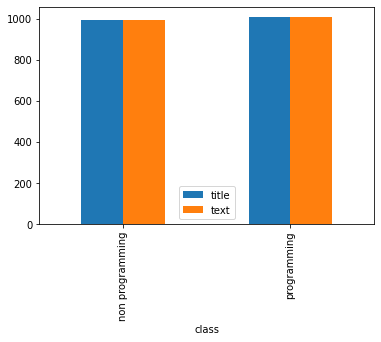

In [22]:
from matplotlib import pyplot as plt
train_set.groupby('class').count().plot.bar()
plt.show()

Possiamo adesso osservare parte dei due set per verificare che essi siano stati creati correttamente.

In [23]:
train_set.head()

,title,text,class
4729,grammar of the ARM source language ?,"Hi all,\n\nThe [home of the Ada Reference Man...",programming
2675,Acoustic guitar songs for friend's birth,So I(M) want to play something for my female f...,non programming
193,pls is a better ls for developers,I made a small CLI tool called `pls` ([repo](h...,programming
3520,What is the most unbelievable thing that,April 19th 2021 is the date when NBA teams pla...,non programming
4445,Depending on external library in GPRBuil,How can one depend on an external library in a...,programming


In [24]:
test_set.head()

,title,text,class
80,Chat-App - Now Chatting in terminal,# Chat-App\nSo what chat-app is basically? \nI...,programming
2238,[QUESTION] is it worth putting locking t,Title. Been thinking about putting locking tun...,non programming
3552,Cam Thomas with 22/4/4 in a loss to the,He scored 22/4/4 on \n\n8-18 from the field\n\...,non programming
967,std::string_view could be made null char,This could be done in many ways:\n\n1. std::st...,programming
2806,Is Java hashCode() and equals() API flaw,"EDIT:\n\n*First of all, thank you all for the ...",programming


## 3. Rappresentazione Bag of Word e creazione del vettore BOW

Dopo aver ottenuto i set su cui lavorare è necessario applicare ad essi una **funzione di trasformazione** che permetta di rappresentare in una forma comprensibile all'algoritmo.
A tal proposito utilizziamo la rappresentazione **Bag of Words** che dato un corpus di documenti (i nostri post) ritorna una rappresentazione che non considera l'ordine o il significato delle parole: dopo una fase di pre-processing in cui vengono applicati alcuni step della **NLP pipeline** ad ogni post verrà associato un ***vettore di lunghezza fissa*** che lo rappresenta in cui saranno evidenziati soltanto i termini appartenenti a quello specifico documento.
Per effettuare quest'operazione utilizzeremo ancora **sklearn** e in particolare l'oggetto **CountVectorizer**.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [26]:
x_train = count_vect.fit_transform(train_set['text'])
x_train

<2001x17032 sparse matrix of type '<class 'numpy.int64'>'
	with 141467 stored elements in Compressed Sparse Row format>

Come possiamo notare, dopo l'applicazione della funzione, il training set verrà rappresentato attraverso una **sparse matrix** e non più come un **dataframe**, questo per ottimizzare lo spazio occupato.

In [27]:
print(len(count_vect.vocabulary_))

17032


Un'altra importante informazione da visualizzare è la lunghezza del **vocabolario**, essa infatti rappresenta il numero di token estratti dal corpus. A partire da questa grandezza, ogni post verrà rappresentato tramite un vettore di lunghezza pari alla grandezza del vocabolario.

## 4. Classificazione kNN con k pari 1

L'algoritmo **kNN** nasce come ottimizzazione dell'algoritmo **Neirest Neighbour**, infatti **k** è un **iperparametro** che rappresenta il numero di vicini nell'intorno dell'osservazione da classificare che verranno considerati per stimare la classe del dato in input.

Come prima cosa applichiamo il kNN nella sua versione **Naive** (k=1) per osservarne i risultati.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #impostiamo il numero di vicini pari a uno

Effettuiamo il training tramite la funzione **fit** fornita da sklearn:

In [29]:
knn.fit(x_train, train_set['class'])

KNeighborsClassifier(n_neighbors=1)

Dopo aver addestrato il classificatore è possibile effettuare una prova applicandolo su un'osservazione del test set che non ha mai visto e confrontandola con la classe di appartenenza reale. L'algoritmo è addestrato sulla rappresentazione bow dei post, sarà dunque prima necessario trasformare anche l'osservazione in input opportunamente:

In [30]:
test = test_set.iloc[1]['text']
trueclass = test_set.iloc[1]['class']
test

'Title. Been thinking about putting locking tuners on my guitar but not sure if its worth the hundred bucks given theres a locking nut. Thoughts?'

In [31]:
feats=count_vect.transform([test])
feats

<1x17032 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [32]:
print("classe predetta:", knn.predict(feats)[0])
print("classe reale:", trueclass)

classe predetta: non programming
classe reale: non programming


Calcoliamo adesso la predizione su tutti gli elementi del test set per poi poter ricavare delle **misure di performance** del classificatore:

In [33]:
x_test = count_vect.transform(test_set['text'])
y_test_pred = knn.predict(x_test)

Come misura utilizzeremo l'**f1-score**, una misura ottenuta come **la media armonica di precision e recall** che fornisce una **visuale completa** della bontà del classificatore.

In [34]:
from sklearn.metrics import f1_score
#average=None is needed to obtain per-class scores. This will be just one class in our case.
#labels=['spam'] is needed to indicate that we are considering "spam" as the positive class
f1_scores = f1_score(test_set['class'], y_test_pred, average=None, labels=['programming'])[0]
print("F1-score K = 1:", f1_scores)

F1-score K = 1: 0.7477744807121662


Per avere contezza degli errori del classificatore, essendo agevolati dalla situazione binaria in cui ci troviamo è possibile visualizzare la **confusion matrix** che fornisce la quantità di osservazioni classificate correttamente e la tipologia di errori commessi, in genere si preferiscono valori alti sulla diagonale principale e viceversa valori bassi sulla diagonale secondaria. Infatti, essendo rappresentate sull'asse delle ascisse i valori **predetti** e su quella delle ordinate i valori **reali** le osservazioni per cui i due valori coincidono (diagonale principale) saranno quelle classificate correttamente.

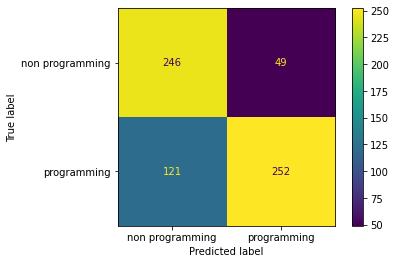

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 5. Stima del K migliore

Come detto prima, k è un iperparametro che va ottimizzato sulla base di un **validation set**, infatti al fine di ottenere il massimo rendimento dal classificatore, k va scelto con criterio. Per effettuare il **"tuning"** di k, verra usata ancora sklearn, in particolare tramite il metodo **GridSearchCV** verranno testati vari k (***da 1 a 20***): il k che otterrà f1score migliore verrà scelto come iperaparametro.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train,train_set['class'])
bestK= gs.best_params_['n_neighbors']

Cerchiamo adesso un **riscontro grafico** che ci permetta di osservare l'andamento dell'algoritmo al variare di k.

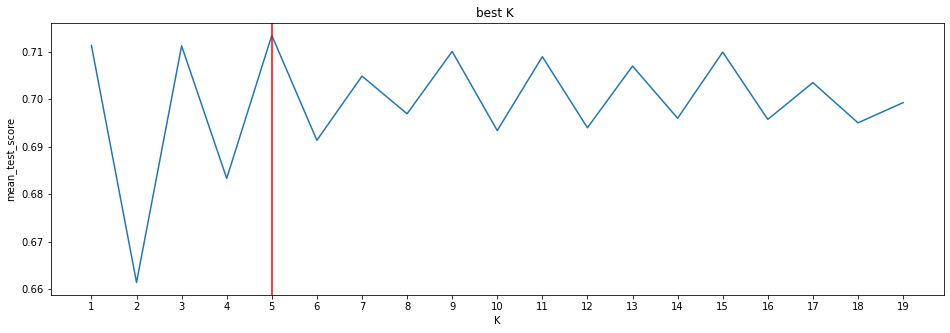

In [37]:
import matplotlib.pyplot as plt 
asseY = gs.cv_results_['mean_test_score']
asseX = list(range(1,20))
plt.figure(figsize = (16,5))
plt.plot(asseY)
plt.xticks(np.arange(len(asseY)), np.arange(1, len(asseY)+1)) #tick asse X

plt.title("best K ")
plt.xlabel("K")
plt.ylabel("mean_test_score")
max_value = max(asseY) 
max_index =np.where(asseY == max_value) #cerco dove il valore è max per stampare poi la linea rossa
plt.axvline(max_index, color = "r")
plt.show()

Possiamo adesso visualizzare l'output ottenuto dal tuning, ovvero il k migliore:

In [38]:
print("k migliore:", bestK)

k migliore: 5


Dopo aver stimato il parametro k ideale rieffettuiamo la classificazione e calcoliamo l'f1score e la matrice di confusione nuovamente:

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, train_set['class'])
x_test = count_vect.transform(test_set['text'])
y_test_pred2 = knn.predict(x_test)
f1_scores = f1_score(test_set['class'], y_test_pred2, average=None, labels=['programming'])[0]
print("F1-score k =",bestK,":", f1_scores)

F1-score k = 5 : 0.7431059506531205


Matrice di confusione con k ottimale:

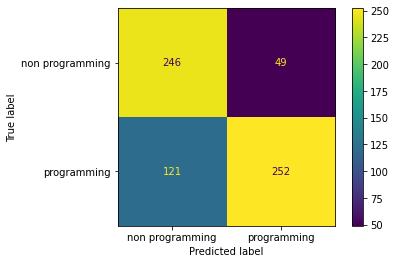

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 6. Ottimizzazione tramite rappresentazione TF-IDF

Si cerca adesso ad ottimizzare la rappresentazione dei dati a disposizione allo scopo di migliorare le performance del classificatore.
L'obiettivo è quello di fornire a parole meno frequenti (e quindi più significative) un peso maggiore e viceversa a parole più frequenti (meno significative) un peso minore. Questa tipologia di rappresentazione prende il nome di **TF-IDF** e permette di ottenere una classificazione più accurata e meno sensibile agli **outliers**.
Per realizzare quanto detto prima, verrà istanziato un nuovo classificatore che sarà però addestrato sui dati rappresentati tramite l'oggetto **TfidfTransformer** fornito da sklearn che calcola la rappresentazione **TF-IDF** dei post.

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts = count_vect.fit_transform(train_set['text'])
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(test_set['text'])
x_test_tf_idf = tf_transformer.fit_transform(x_test_counts)

Dopo aver ottenuto la rappresentazione tf-idf dei dati, ricerchiamo il k migliore per poi applicare l'algoritmo kNN:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train_tf_idf,train_set['class'])
bestK2= gs.best_params_['n_neighbors']


In [43]:
print("k migliore tf-idf:", bestK2)

k migliore tf-idf: 10


Viene effettuata adesso il calcolo delle predizioni su tutto il test set:

In [44]:
classifier = KNeighborsClassifier(n_neighbors=bestK2)
classifier.fit(x_train_tf_idf, train_set['class'])

KNeighborsClassifier(n_neighbors=10)

calcoliamo l'**f1-score**:

In [45]:
y_test_preds = classifier.predict(x_test_tf_idf)
f1_scores=f1_score(test_set['class'],y_test_preds, average=None, labels=['programming'])[0]
print("f1-score tf-idf:",f1_scores)

f1-score tf-idf: 0.8837837837837836


Anche in questo caso è possibile ottenere la matrice di confusione:

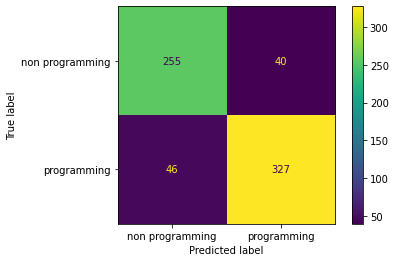

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_preds)

## 7. Confronto tra i vari classificatori

E' possibile adesso confrontare i tre risultati ottenuti visualizzando la **curva PR**, ovvero la curva che mette in realzione **precision** e **recall**. Prima di fare ciò è però necessario ai fini della rappresentazione, mappare i nomi delle classi, avremo dunque:
* **non programming** = 0;
* **programming** = 1;

Di seguito il processo di mapping e il plot della curva PR:

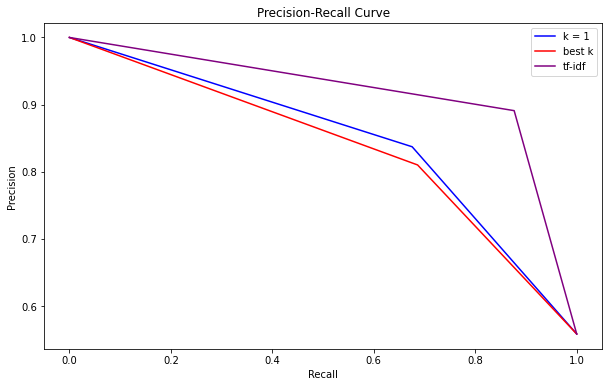

In [47]:
#map delle etichette reali
test_zero_one = test_set.copy()
test_zero_one = test_zero_one.replace(to_replace=['non programming', 'programming'], value=[0, 1])

#map delle varie predizioni
y_preds_zero_one_tf_idf = y_test_preds.copy()
for i in range(y_preds_zero_one_tf_idf.size):
    if(y_preds_zero_one_tf_idf[i] == 'programming'):
        y_preds_zero_one_tf_idf[i] = 1
    else:
        y_preds_zero_one_tf_idf[i] = 0

        
y_preds_zero_one_bestk = y_test_pred2.copy()
for i in range(y_preds_zero_one_bestk.size):
    if(y_preds_zero_one_bestk[i] == 'programming'):
        y_preds_zero_one_bestk[i] = 1
    else:
        y_preds_zero_one_bestk[i] = 0
        
y_preds_zero_one_k1 = y_test_pred.copy()
for i in range(y_preds_zero_one_k1.size):
    if(y_preds_zero_one_k1[i] == 'programming'):
        y_preds_zero_one_k1[i] = 1
    else:
        y_preds_zero_one_k1[i] = 0  
        
#generazione valori x,y della curva PR e plot
from sklearn.metrics import precision_recall_curve
from matplotlib.pyplot import figure
figure(figsize=(10, 6))

precision_k1, recall_k1, thresholds_k1 = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_k1)
plt.plot(recall_k1, precision_k1, color='blue', label='k = 1')

precision_bestk, recall_bestk, thresholds_bestk = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_bestk)
plt.plot(recall_bestk, precision_bestk, color='red', label='best k')

precision_tfidf, recall_tfidf, thresholds_tfidf = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_tf_idf)
plt.plot(recall_tfidf, precision_tfidf, color='purple', label='tf-idf')

plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.legend()
plt.show()

E' possibile adesso calcolare l'**area under the curver**, ovvero una metrica che calcolando l'area sottesa alla curva PR permette di stimare la bontà del classificatore. L'AUC è un valore compreso tra 0 e 1, idealmente vorremmo che il nostro classificatore abbia **AUC = 1**.

In [48]:
from sklearn.metrics import roc_auc_score
auc_k1 = roc_auc_score(test_zero_one['class'],y_preds_zero_one_k1)
auc_bestk = roc_auc_score(test_zero_one['class'],y_preds_zero_one_bestk)
auc_tfidf = roc_auc_score(test_zero_one['class'],y_preds_zero_one_tf_idf)

print('AUC k=1: %.3f' % auc_k1)
print('AUC best k: %.3f' % auc_bestk)
print('AUC tf-idf: %.3f' % auc_tfidf)

AUC k=1: 0.755
AUC best k: 0.741
AUC tf-idf: 0.871


## 8. Sentiment analysis sui post che parlano di programmazione

Dopo aver classificato i post provenienti dai vari subreddit, verrà adesso analizzato il **sentiment** ovvero, lo stato d'animo dell'autore quando ha scritto quel determinato post. Alla fine verrà stimata una **media** dei sentiment per vedere se in generale, tramite Reddit gli utenti esprimono le loro problematiche o evidenziano i punti di forza di un linguaggio e lo consigliano.
Per portare a termine questo compito verrà usato l'algoritmo **VADER**, ovvero un algoritmo per la **sentiment analysis** slegato dal dominio delle osservazioni in input e che assegna ad ogni parola un punteggio, basato su statistiche ottenute dalla media di punteggi espressi da dei volontari durante la fase di creazione dell'algoritmo.
Per effettuare l'analisi utilizzando VADER faremo uso della libreria **nltk**.

Come prima cosa è necessario caricare il package di lexicon fornito da vader:

In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rosario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

A questo punto sarà possibile creare l'oggetto **sid** che permetterà di effettuare il **calcolo del sentiment**.

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Prima di procedere bisogna creare  un dataframe che contiene solamente i post che sono stati classificati come "programming" nel test set avendo a disposizione il test set e gli indici ottenuti dal classificatore, questa operazione di filtraggio renderà più semplice l'analisi e la visualizzazione dei dati. 

Come prima cosa conserviamo solo gli indici dei post classificati come "non programming" in modo da rimuoverli successivamente dal test set su cui applicare VADER:

In [51]:
output = [idx for idx, element in enumerate(y_test_preds) if len(element) == 'non programming']

A questo punto, possono essere rimossi da **dfProg** tutti i record la cui predizione è diversa da 'programming':

In [52]:
dfProg = test_set.copy()
dfProg = dfProg.drop(labels=output, axis=0)
dfProg

,title,text,class
80,Chat-App - Now Chatting in terminal,# Chat-App\nSo what chat-app is basically? \nI...,programming
2238,[QUESTION] is it worth putting locking t,Title. Been thinking about putting locking tun...,non programming
3552,Cam Thomas with 22/4/4 in a loss to the,He scored 22/4/4 on \n\n8-18 from the field\n\...,non programming
967,std::string_view could be made null char,This could be done in many ways:\n\n1. std::st...,programming
2806,Is Java hashCode() and equals() API flaw,"EDIT:\n\n*First of all, thank you all for the ...",programming
...,...,...,...
4785,Ann: HAC v.0.076,"**HAC** (**HAC Ada Compiler**) is a small, qui...",programming
2472,[QUESTION] Audition (Teisco?) Elvis Guit,Does anybody know anything about this guitar?...,non programming
2610,[QUESTION] Why do I need to mute the 6th,I've seen in a lot of videos or chord diagrams...,non programming
873,The spacesship operator silently broke m,I have an old Qt3 project that is compliled wi...,programming


Ovviamente saranno presenti anche record 'non programming' in corrispondenza degli errori effettuati dal classificatore.

Verrà affiancata al dataframe una nuova colonna che prenderà il nome di **'score'** ottenuta dal lexicon score di vader, in questo modo sarà possibile osservare il post e il rispettivo punteggio.
Calcoliamo per ogni riga del dataframe già filtrato il **compound** del testo associato: VADER ritorna diversi valori in output che rappresentano la percentuale di positività, neutralità e negatività del testo analizzato, il compound non è altro che la media di essi, ovvero il lexicon score effettivo.

In [53]:
rows, cols = dfProg.shape
score = []
for i in range(rows):
    score.append(sid.polarity_scores(dfProg.iloc[i]['text'])['compound'])

In [54]:
dfProg = dfProg.assign(score = score)
dfProg

,title,text,class,score
80,Chat-App - Now Chatting in terminal,# Chat-App\nSo what chat-app is basically? \nI...,programming,0.9365
2238,[QUESTION] is it worth putting locking t,Title. Been thinking about putting locking tun...,non programming,-0.0240
3552,Cam Thomas with 22/4/4 in a loss to the,He scored 22/4/4 on \n\n8-18 from the field\n\...,non programming,0.8625
967,std::string_view could be made null char,This could be done in many ways:\n\n1. std::st...,programming,0.6486
2806,Is Java hashCode() and equals() API flaw,"EDIT:\n\n*First of all, thank you all for the ...",programming,0.8151
...,...,...,...,...
4785,Ann: HAC v.0.076,"**HAC** (**HAC Ada Compiler**) is a small, qui...",programming,0.5411
2472,[QUESTION] Audition (Teisco?) Elvis Guit,Does anybody know anything about this guitar?...,non programming,0.1901
2610,[QUESTION] Why do I need to mute the 6th,I've seen in a lot of videos or chord diagrams...,non programming,0.3468
873,The spacesship operator silently broke m,I have an old Qt3 project that is compliled wi...,programming,0.8684


Il compound è un valore compreso tra -1 e 1, dove 1 indica che il sentiment della frase è totalmente positivo mentre -1 che il sentiment è totalmente negativo.

Come ultimo passaggio dell'analisi è possibile adesso calcolare la media dello score delle singole valutazioni per vedere in generale il sentiment rispetto a quello che sono i post nei subreddit di programmazione: la media sarà superiore allo zero in caso di esito positivo e inferiore nel caso contrario:

In [56]:
import statistics
print("media sentiment post di programmazione:", statistics.mean(score))

media sentiment post di programmazione: 0.46921062874251496


## 9. Conclusioni

Concludendo, quella ottenuta è una **pipeline** che dato un insieme di post provenienti da Reddit (comunque generalizzabile a qualsiasi fonte) permette di estrarre solo quelli che trattano di programmazione e di analizzarne il sentiment in modo da trarre delle conclusioni e stimare il pensiero degli utenti che fanno uso dei vari linguaggi. Sono state marcate le differenze tra le varie ottimizzazioni che è possibile applicare ad un algoritmo semplice come il kNN che si ricorda essere un algoritmo **lazy**, ovvero un algoritmo la cui fase di training si limita a memorizzare il training set e ad approssimare una pseudofunzione di classificazione solo nel momento in cui viene richiesto di classificare una nuova osservazione. 
Generalizzando, questa catena di processi è utilizzabile ogni qual volta data una quantità di dati generici, si vuole isolare una sola categoria di essi per capire se di quest'ultima si sta parlando positivamente o meno. Il processo è applicabile in molti contesti e quello dei post di un social network ne è l'esempio più generale.